## Fig. 2 | Distribution of incident clones. 
The majority of incident clones arise after 75 years of age.

In [1]:
library(data.table)
library(stringr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(ggpubr)
library(cowplot)
library(ggridges)
theme_set(theme_cowplot())

## 
setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/pheno/")


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend




In [2]:
# qcd CH variants with phenotypes
ch_var_in_v05_qcd.pheno <- fread("ch_var_in_v05_qcd_pheno.23Mar2023.csv", header = T)

# aric_baseline_n_v05 <- fread("aric_baseline_n_v05_N4189.pheno_ch_status.9May2023.csv", header=T)
aric_baseline_n_v05_noPrevHeme <- fread("aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.9May2023.csv", header=T)

aric_baseline_n_v05_noPrevHeme$dAge <- aric_baseline_n_v05_noPrevHeme$Age - aric_baseline_n_v05_noPrevHeme$age_base
summary(aric_baseline_n_v05_noPrevHeme$dAge)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   20.00   21.00   20.31   21.00   27.00 

In [3]:
table(ch_var_in_v05_qcd.pheno$GWAS_ID %in% aric_baseline_n_v05_noPrevHeme$GWAS_ID)
nrow(aric_baseline_n_v05_noPrevHeme)
ch_var_in_v05_qcd.pheno <- subset(ch_var_in_v05_qcd.pheno, 
                                  ch_var_in_v05_qcd.pheno$GWAS_ID %in% aric_baseline_n_v05_noPrevHeme$GWAS_ID)
# Incident variants only
incident_ch_var_in_v05_qcd.pheno <- subset(ch_var_in_v05_qcd.pheno, 
                                           ch_var_in_v05_qcd.pheno$GWAS_ID %in% 
                                             aric_baseline_n_v05_noPrevHeme$GWAS_ID[!is.na(aric_baseline_n_v05_noPrevHeme$incident_CH)])

table(table(incident_ch_var_in_v05_qcd.pheno$GWAS_ID))

prop.table(table(table(incident_ch_var_in_v05_qcd.pheno$GWAS_ID)>1))
cat("Incident CH")
sort((table(incident_ch_var_in_v05_qcd.pheno$Gene)),decreasing = T)
cat("CH at Follow-up")
sort((table(ch_var_in_v05_qcd.pheno$Gene)),decreasing = T)

###
cat("incident CH at VAF>=10%")
sort((table(incident_ch_var_in_v05_qcd.pheno$Gene[incident_ch_var_in_v05_qcd.pheno$VAF>=0.1])),decreasing = T)
cat("incident CH at VAF<10%")
sort((table(incident_ch_var_in_v05_qcd.pheno$Gene[incident_ch_var_in_v05_qcd.pheno$VAF<0.1])),decreasing = T)



TRUE 
1302 

[1] 4187


  1   2   3   4 
615 103  13   4 


    FALSE      TRUE 
0.8367347 0.1632653 

Incident CH


DNMT3A   TET2  ASXL1  SF3B1  PPM1D   TP53  SRSF2 ZBTB33  STAG2   JAK2  YLPM1 
   328    182     65     36     31     22     19     19     16     14     11 
ZNF318  PDS5B  SRCAP    CBL   GNB1  U2AF1  ZRSR2  BRCC3   PHIP  ASXL2   IDH2 
    11     10     10      8      7      7      7      6      6      5      5 
 KDM6A    NF1  PRPF8 CREBBP   CUX1   KRAS   NXF1   PHF6   BCOR   BRAF  EP300 
     4      4      4      3      3      3      3      3      2      2      2 
  NRAS   PTEN  RAD21   CBLB   CTCF   ETV6   EZH2   IDH1    KIT    MPL PTPN11 
     2      2      2      1      1      1      1      1      1      1      1 
 RUNX1 SETBP1  SETD2  SUZ12 
     1      1      1      1 

CH at Follow-up


DNMT3A   TET2  ASXL1  SF3B1  PPM1D   TP53  SRSF2 ZBTB33 ZNF318  STAG2   JAK2 
   540    258     97     42     41     31     29     25     24     19     18 
 SRCAP  YLPM1  BRCC3  U2AF1  PDS5B    CBL   GNB1    NF1  ZRSR2   IDH2   PHIP 
    14     14     13     12     11     10      9      8      8      7      7 
 ASXL2  KDM6A  PRPF8   CUX1   KRAS   NRAS CREBBP   NXF1   PHF6   PTEN   BCOR 
     6      5      5      4      4      4      3      3      3      3      2 
  BRAF  EP300   EZH2 PTPN11  RAD21  SUZ12 BCORL1   CBLB   CTCF   ETV6   IDH1 
     2      2      2      2      2      2      1      1      1      1      1 
 IKZF2    KIT    MPL  RUNX1 SETBP1  SETD2 
     1      1      1      1      1      1 

incident CH at VAF>=10%


DNMT3A   TET2  ASXL1  SF3B1  PPM1D   JAK2   TP53  SRSF2  STAG2  U2AF1 ZBTB33 
    94     70     35     18     12     10     10      8      6      6      6 
ZNF318  ZRSR2   IDH2  PRPF8  BRCC3 CREBBP   CUX1   NRAS   PHIP  SRCAP  YLPM1 
     6      5      4      4      3      2      2      2      2      2      2 
   CBL   EZH2   GNB1   IDH1  KDM6A    KIT   KRAS    MPL   NXF1  PDS5B   PHF6 
     1      1      1      1      1      1      1      1      1      1      1 
PTPN11 SETBP1 
     1      1 

incident CH at VAF<10%


DNMT3A   TET2  ASXL1  PPM1D  SF3B1 ZBTB33   TP53  SRSF2  STAG2  PDS5B  YLPM1 
   234    112     30     19     18     13     12     11     10      9      9 
 SRCAP    CBL   GNB1  ASXL2 ZNF318   JAK2    NF1   PHIP  BRCC3  KDM6A   BCOR 
     8      7      6      5      5      4      4      4      3      3      2 
  BRAF  EP300   KRAS   NXF1   PHF6   PTEN  RAD21  ZRSR2   CBLB CREBBP   CTCF 
     2      2      2      2      2      2      2      2      1      1      1 
  CUX1   ETV6   IDH2  RUNX1  SETD2  SUZ12  U2AF1 
     1      1      1      1      1      1      1 

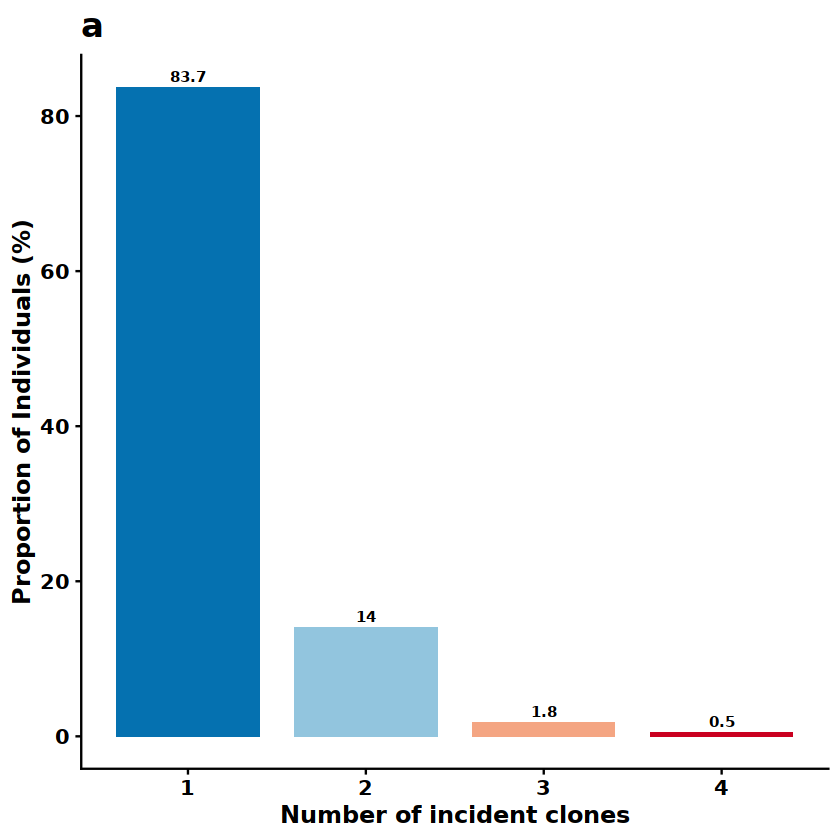

In [4]:
####
# Fig. Distribution of incident CH  ####
####
#### Fig 2a ####
## Count per sample
## number of CHIP mutation per sample
count.aric <- as.data.frame(round(prop.table(table(table(incident_ch_var_in_v05_qcd.pheno$GWAS_ID)))
                                  *100,1))
count.aric$Cohort <- "ARIC"
# png("~/Documents/Project/Baylor_ARIC_Exomes/Paper1_ARIC/epi/inc_per_samp.png",
#     width=8, height=6, units= "in", res=300, pointsize = 4)

a <- ggplot(data=count.aric, 
            aes(x=reorder(Var1, -Freq), y=Freq, fill=factor(Freq)) ) +
  xlab("Number of incident clones") +
  ylab(label = "Proportion of Individuals (%)") +
  geom_bar(stat="identity", width=0.8, 
           position=position_dodge(.9)) +
  geom_text(aes(label=Freq), vjust=-0.5, color="black",
            position = position_dodge(0.9), size=3, fontface = "bold") +
  theme(legend.title = element_blank(), 
        legend.position = "", 
        plot.title = element_text(size = 20, face = "bold"),
        axis.text=element_text(size=12, face="bold"),
        axis.title=element_text(size=14,face="bold")) + 
scale_color_brewer(type = "div", 
                     palette = "RdBu",
                     direction = 1, 
                     aesthetics = "fill" ) +
  ggtitle("a")
a
# dev.off()



[1] "Var1"           "Freq"           "n_VAF2"         "n_VAF10"       
 [5] "prop_VAF2"      "prop_VAF10"     "all_prop_VAF2"  "Group_1"       
 [9] "all_prop_VAF10" "Group_2"

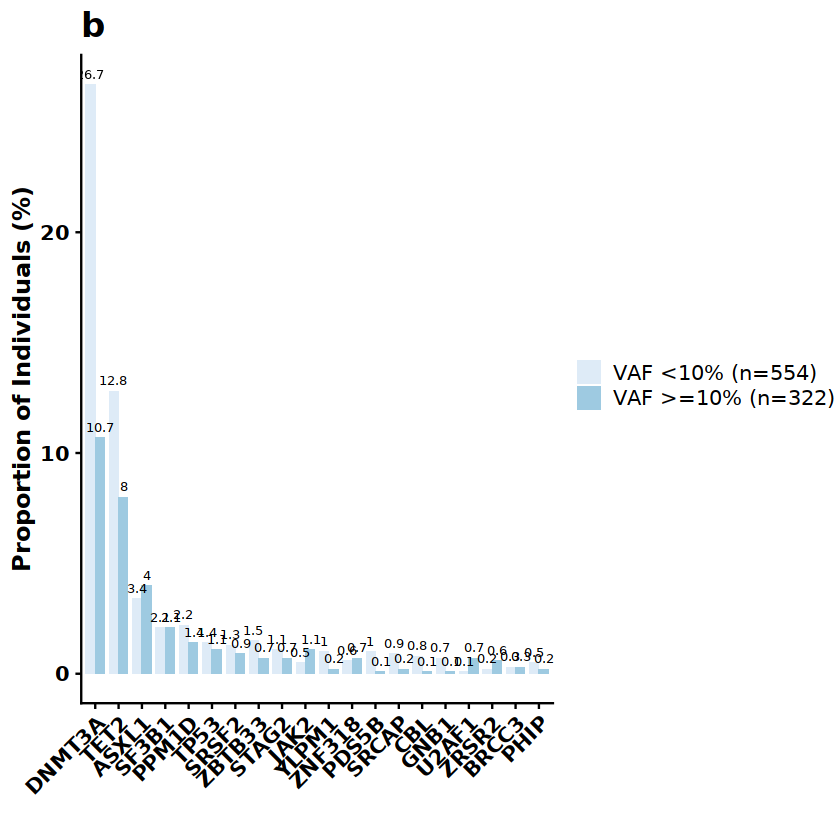

In [8]:
#### Fig 2b ####
## Gene Table
CH_Gene_Table.vaf2 <- as.data.frame(round(prop.table(table(
  incident_ch_var_in_v05_qcd.pheno$Gene
  [incident_ch_var_in_v05_qcd.pheno$VAF<0.1]))*100,1),
  stringsAsFactors = F)
CH_Gene_Table.vaf2$Cohort <- "VAF<10%"

CH_Gene_Table.vaf10 <- as.data.frame(round(prop.table(table(
  incident_ch_var_in_v05_qcd.pheno$Gene
  [incident_ch_var_in_v05_qcd.pheno$VAF>=0.1]))*100,1),
  stringsAsFactors = F)
CH_Gene_Table.vaf10$Cohort <- "VAF>=10%"
###
CH_Gene_Table <- as.data.frame(table(incident_ch_var_in_v05_qcd.pheno$Gene), )
CH_Gene_Table$n_VAF2 <- 0
CH_Gene_Table$n_VAF10 <- 0
for (i in 1:nrow(CH_Gene_Table)){
  # CH_Gene_Table$n_VAF2[i] <- table(incident_ch_var_in_v05_qcd.pheno$Gene==CH_Gene_Table$Var1[i] & incident_ch_var_in_v05_qcd.pheno$VAF<0.1)[[2]]
  CH_Gene_Table$n_VAF2[i] <- (incident_ch_var_in_v05_qcd.pheno %>% filter(Gene==CH_Gene_Table$Var1[i] & VAF<0.1) %>% summarise(n=n()) )$n
  
  CH_Gene_Table$n_VAF10[i] <- (incident_ch_var_in_v05_qcd.pheno %>% filter(Gene==CH_Gene_Table$Var1[i] & VAF>=0.1) %>% summarise(n=n()) )$n

}

CH_Gene_Table$prop_VAF2 <- round(CH_Gene_Table$n_VAF2/CH_Gene_Table$Freq *100,1)
CH_Gene_Table$prop_VAF10 <- round(CH_Gene_Table$n_VAF10/CH_Gene_Table$Freq *100,1)

CH_Gene_Table$all_prop_VAF2 <- round(CH_Gene_Table$n_VAF2/sum(CH_Gene_Table$Freq) *100, 1)
CH_Gene_Table$Group_1 <- "VAF <10% (n=554)"
CH_Gene_Table$all_prop_VAF10 <- round(CH_Gene_Table$n_VAF10/sum(CH_Gene_Table$Freq) *100,1)
CH_Gene_Table$Group_2 <- "VAF >=10% (n=322)"
names(CH_Gene_Table)
plt_CH_Gene_Table <- rbindlist(
  list(d1=CH_Gene_Table[,c(1,2,3,5,7,8)],
       d2=CH_Gene_Table[,c(1,2,4,6,9,10)]), 
  use.names=F)

names(plt_CH_Gene_Table) <- c("Gene", "Total", 
                              "n_by_strata", 
                              "Prop.relative_2_gene", 
                              "Prop.with_all", 
                              "Group")

plt_CH_Gene_Table$Prop.with_all[plt_CH_Gene_Table$Prop.with_all==0] <- NA

# CH_Gene_Table$Cohort <- factor(CH_Gene_Table$Cohort, 
#                                levels = c("VAF<10%", 
#                                           "VAF>=10"))
  # all
# barplot(sort(table(incident_ch_var_in_v05_qcd.pheno$Gene), 
#              decreasing = T), las=2)
# png("~/Documents/Project/Baylor_ARIC_Exomes/Paper1_ARIC/epi/gene_table.png",
#     width=12, height=6, units= "in", res=300, pointsize = 4)
b <- plt_CH_Gene_Table %>% 
  filter(Gene %in% unique(head(plt_CH_Gene_Table[order(plt_CH_Gene_Table$Total, decreasing = T),], n = 40)$Gene)) %>% 
  ggplot(data=., 
       aes(x=reorder(Gene, -Total),
           y=Prop.with_all, fill=Group)) + xlab("") +
  ylab(label = "Proportion of Individuals (%)") +
  geom_bar(stat="identity", 
           width=0.8, position=position_dodge()) +
  geom_text(aes(label=Prop.with_all), vjust=-0.65, 
            color="black",
            position = position_dodge(0.9), size=2.7) +
  theme(axis.text.x = element_text(angle = 45,
                                   vjust = 1,  hjust=1),
        legend.title = element_blank(), 
        legend.position = "right", 
        plot.title = element_text(size = 20, face = "bold"),
        axis.text=element_text(size=12, face="bold"),
        axis.title=element_text(size=14,face="bold")) +
scale_color_brewer(type = "seq", 
                     palette = "Blues",
                     direction = 1, 
                     aesthetics = "fill" ) +
  ggtitle("b")
b
# dev.off()




DDR DTA  SF 
 53 575  69 

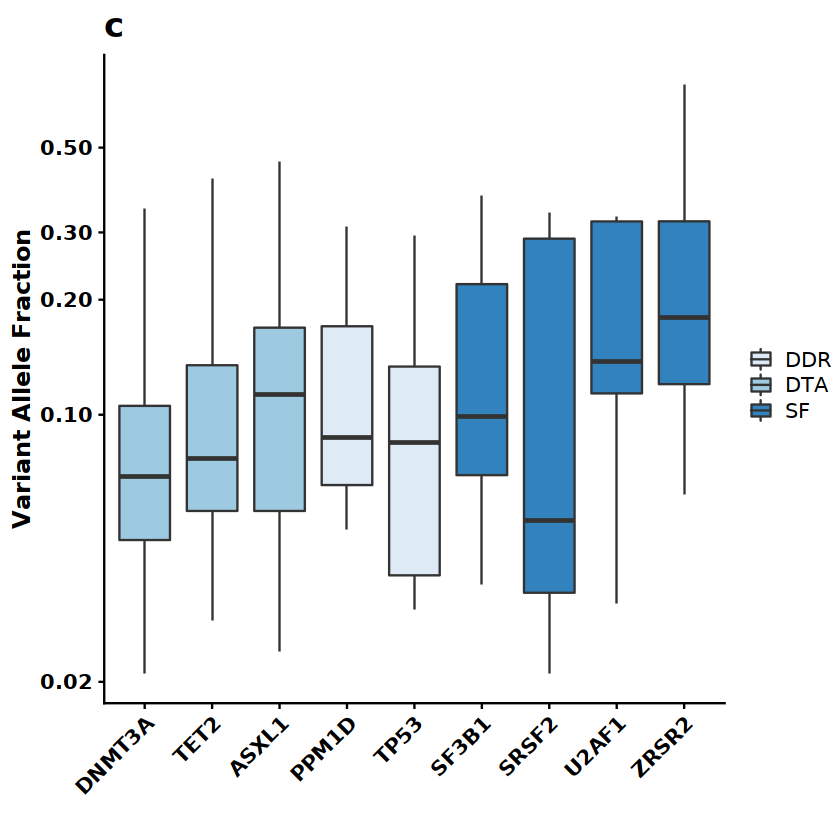

In [10]:
#### Fig 2c ####
## VAF
### VAF distributions for selected genes
vaf_plot <- subset(incident_ch_var_in_v05_qcd.pheno, 
                   incident_ch_var_in_v05_qcd.pheno$Gene %in% 
                     c("DNMT3A", "TET2", "ASXL1", "PPM1D", "TP53", 
                       "SF3B1","SRSF2", "U2AF1", "ZRSR2"))
vaf_plot$Gene_group <- ifelse(vaf_plot$Gene %in% 
                                c("DNMT3A", "TET2", "ASXL1"),
                              "DTA", 
                              ifelse(vaf_plot$Gene %in% 
                                       c("PPM1D", "TP53"), 
                                     "DDR", 
                                     ifelse(vaf_plot$Gene %in% 
                                              c("SF3B1","SRSF2", "U2AF1", "ZRSR2"), 
                                            "SF", "Other" )))

vaf_plot$Gene_group <- factor(vaf_plot$Gene_group, 
                        levels = c("DTA", "DDR", "SF") )

table(vaf_plot$Gene_group)
vaf_plot$Gene <- factor(vaf_plot$Gene, 
                        levels = c("DNMT3A", "TET2", "ASXL1", 
                                   "PPM1D", "TP53", 
                                   "SF3B1","SRSF2", "U2AF1", "ZRSR2") )
# png("~/Documents/Project/Baylor_ARIC_Exomes/Paper1_ARIC/epi/vaf_distribution.png",
#     width=8, height=6, units= "in", res=300, pointsize = 4)

# c <- ggplot(data=vaf_plot, aes(x=Gene, y=VAF, fill=Gene_group)) + 
#   xlab("") + ylab("Variant Allele Fraction") + 
#   geom_violin(trim = T) + scale_y_log10(breaks = c(0.02,0.1,.2,.3, 0.5,1)) +
#   theme(axis.text.x = element_text(angle = 45, vjust = 1,  hjust=1),
#         legend.title = element_blank(), 
#         plot.title = element_text(size = 20, face = "bold"),
#         axis.text=element_text(size=12, face="bold"),
#         axis.title=element_text(size=14,face="bold")) + 
#   ggtitle("c") +
#   stat_summary(fun = "median", geom = "point",
#                color = "white", 
#                position = position_dodge(0.9))
# c

###
c <- ggplot(data=vaf_plot, aes(x=Gene, y=VAF, fill=Gene_group)) + 
  xlab("") + ylab("Variant Allele Fraction") + 
  geom_boxplot() + scale_y_log10(breaks = c(0.02,0.1,.2,.3, 0.5,1)) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1,  hjust=1),
        legend.title = element_blank(), 
        plot.title = element_text(size = 20, face = "bold"),
        axis.text=element_text(size=12, face="bold"),
        axis.title=element_text(size=14,face="bold")) + 
scale_color_brewer(type = "seq", 
                     palette = "Blues",
                     direction = 1, 
                     aesthetics = "fill" ) +
  ggtitle("c") 
c
####
# dev.off()


`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 457 rows containing non-finite values (stat_smooth)."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 920 rows containing non-finite values (stat_smooth)."


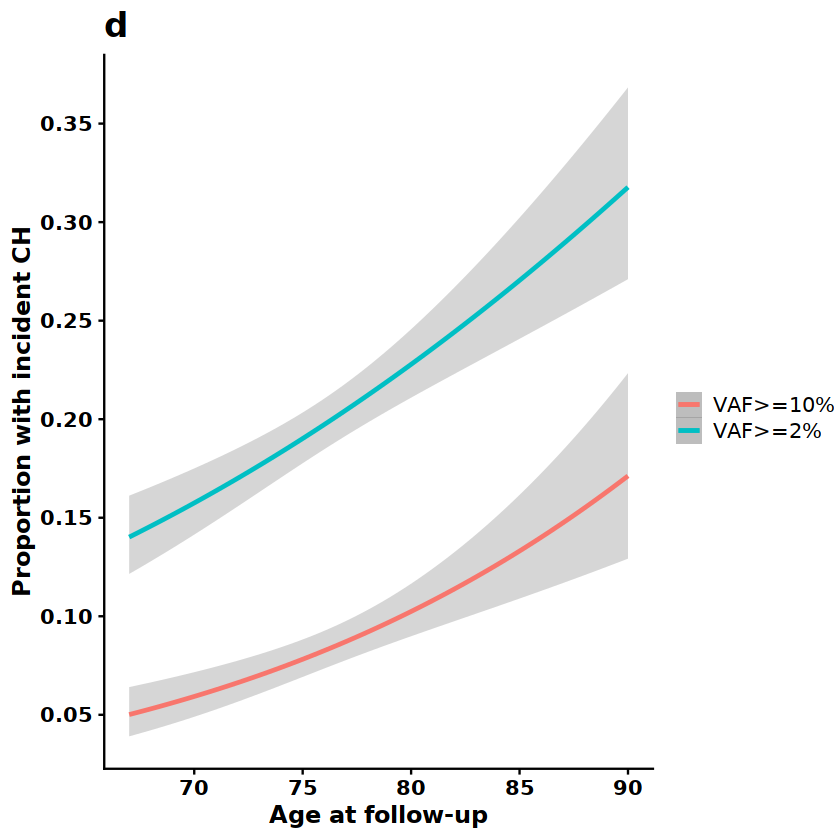

In [16]:
#### Fig 2d ####
d <- ggplot(data=aric_baseline_n_v05_noPrevHeme, aes(x=Age), group=1) + 
  xlab("Age at follow-up") + ylab("Proportion with incident CH") +
#  geom_smooth(aes(y=incident_CH), 
 #             method ="gam") +
geom_smooth(aes(y=incident_CH, colour="VAF>=2%"), 
              method ="glm", method.args = list(family = "binomial")) +
    geom_smooth(aes(y=incident_CHvaf10, colour="VAF>=10%"), 
              method ="glm", method.args = list(family = "binomial")) +
  theme(legend.title = element_blank(), 
        legend.position = "") +
  ggtitle("d") + 
  theme(legend.position = "right", 
        plot.title = element_text(size = 20, face = "bold"), 
        axis.text=element_text(size=12, face="bold"),
        axis.title=element_text(size=14,face="bold")) +
scale_y_continuous(breaks = c(0,0.05,0.1, 0.15, 0.2, 0.25,0.3, 0.35,0.4) )
d

In [ ]:
## multi-panel plot

png("~/Documents/Project/Baylor_ARIC_Exomes/Paper1_ARIC/Display//fig2.dist_incident_CH.noHemeCa_11May23.png",
   width=18, height=10, units= "in", res=300, pointsize = 4)

ggarrange(a, b, 
          c, d, 
          ncol = 2, 
          nrow = 2 )

dev.off()
####
